# Project 8: Neural Networks
## Recognizing multi-digit numbers in photographs captured at street level
#### Objective:
    To implement a simple image classification pipeline based on the k-Nearest Neighbour and a deep neural network. 
#### Dataset:
    SVHN_single_grey1.h5   

In [1]:
# Import Libraries
import h5py
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow.keras as keras
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Import Libraries
import h5py
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow.keras as keras
import os

In [0]:
df = h5py.File("/content/drive/My Drive/Colab Notebooks/SVHN_single_grey1.h5", 'r')

In [0]:
X_train = df['X_train'][:]
X_test = df['X_test'][:]
y_train1 = df['y_train'][:]
y_test1 = df['y_test'][:]

In [0]:
df.close()

In [0]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

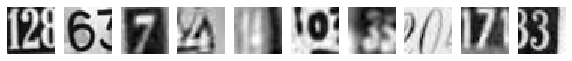

Label = [2 6 7 4 4 0 3 0 7 3]


In [9]:
np.random.seed(7)
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()
print("Label = %s" %(y_train1[0:10]))

In [0]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)
X_train = X_train/255.0
X_test = X_test/255.0

In [0]:
#one hot encode output

y_train = np_utils.to_categorical(y_train1)
y_test = np_utils.to_categorical(y_test1)

In [0]:
X_train1 = []
for i in range(42000):
  X_train1.append(X_train[i,:].flatten())
X_test1 = []
for i in range(18000):
  X_test1.append(X_test[i,:].flatten())

In [0]:
X_train1 = X_train1[:2000]
X_test1 = X_test1[:2000]
y_tr = y_train1[:2000]
y_te = y_test1[:2000]

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [0]:
def knn(k):
  knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
  knn.fit(X_train1, y_tr)
  y_predict = knn.predict(X_test1)
  score = accuracy_score(y_te, y_predict)
  print(score)

In [16]:
for i in range(1,30,2):
  knn(i)

0.2975
0.292
0.3015
0.307
0.3055
0.311
0.2975
0.294
0.2975
0.2935
0.2945
0.2955
0.2865
0.2805
0.279


In [0]:
# K=11 is giving the maximum accuracy.

In [18]:
knn = KNeighborsClassifier(n_neighbors=11, weights='uniform', metric='euclidean')
knn.fit(X_train1, y_tr)
y_predict = knn.predict(X_test1)
score = accuracy_score(y_te, y_predict)
print(score)

0.311


In [21]:
# Comparing the predicted and actual value
print("Actual Value = {}".format(y_te[0]))
print("Predicted Value = {}".format(y_predict[0]))

Actual Value = 1
Predicted Value = 6


In [0]:
# We can see that the KNN model is performing poorly in prediction.

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_predict, y_te)

array([[105,  15,  16,  25,  17,  34,  35,  11,  50,  55],
       [ 17, 101,  29,  33,  32,  30,  22,  25,  19,  17],
       [ 14,  14,  73,  23,  18,  22,  21,  49,  20,  23],
       [ 10,  10,  14,  36,   9,  15,  22,  23,  16,   9],
       [ 12,  17,  11,  10,  93,  15,  17,  13,  17,  14],
       [ 10,   6,   5,  24,   6,  43,  11,   3,  10,  14],
       [ 25,   9,   8,  11,  10,  21,  51,  10,  29,  16],
       [  4,   8,  16,  12,   7,   4,   5,  65,   1,  10],
       [  7,   2,   3,   4,   2,  11,   4,   0,  19,   8],
       [ 17,   3,  12,   7,  10,  16,  14,   6,  17,  36]])

In [24]:
mse = 1 - score
mse

0.6890000000000001

In [0]:
# The performance of KNN model is very poor in image classification as the images are very unique.
# Let's try the same with deep neural network classifier network

In [0]:
import keras
from keras.layers import BatchNormalization
from keras import losses
from keras import optimizers
from keras.layers import Dropout, MaxPooling2D

In [0]:
def neural_network():
    model = Sequential()
    model.add(BatchNormalization(input_shape = (1024,)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    sgd = optimizers.Adam(lr=1e-3)
    model.compile(loss=losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])
    return model

In [56]:
model = neural_network()

In [66]:
perf = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
 - 1s - loss: 0.2722 - acc: 0.9130 - val_loss: 0.6359 - val_acc: 0.8404
Epoch 2/30
 - 1s - loss: 0.2623 - acc: 0.9157 - val_loss: 0.6767 - val_acc: 0.8348
Epoch 3/30
 - 1s - loss: 0.2528 - acc: 0.9190 - val_loss: 0.6778 - val_acc: 0.8342
Epoch 4/30
 - 1s - loss: 0.2492 - acc: 0.9185 - val_loss: 0.6776 - val_acc: 0.8339
Epoch 5/30
 - 1s - loss: 0.2564 - acc: 0.9182 - val_loss: 0.6806 - val_acc: 0.8318
Epoch 6/30
 - 1s - loss: 0.2463 - acc: 0.9209 - val_loss: 0.6695 - val_acc: 0.8406
Epoch 7/30
 - 1s - loss: 0.2342 - acc: 0.9234 - val_loss: 0.6734 - val_acc: 0.8374
Epoch 8/30
 - 1s - loss: 0.2400 - acc: 0.9228 - val_loss: 0.6631 - val_acc: 0.8426
Epoch 9/30
 - 1s - loss: 0.2292 - acc: 0.9260 - val_loss: 0.6700 - val_acc: 0.8433
Epoch 10/30
 - 1s - loss: 0.2239 - acc: 0.9276 - val_loss: 0.6789 - val_acc: 0.8440
Epoch 11/30
 - 1s - loss: 0.2266 - acc: 0.9274 - val_loss: 0.7021 - val_acc: 0.8406
Epoch 12/30
 - 1s - loss: 0.2128 - 

In [67]:
scores = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 52us/step


In [68]:
scores

[0.7786489759551154, 0.8425]

In [69]:
print("error = %.2f%%" %(100 - scores[1]*100))

error = 15.75%


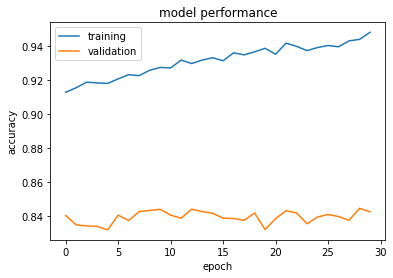

In [73]:
plt.plot(perf.history['acc'])
plt.plot(perf.history['val_acc'])
plt.title('model performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [1]:
# Deep neural network is performing better in image classification than KNN.
# We have increased the accuracy from 31% to 84% using deep neural network.

# Summary:
-> Imported the dataset and splitted it into train, test and validation sets.

-> Applied KNN model, but the performance was poor as the images are very unique.

-> Then, the same was applied on deep neural network and the accuracy got increased to 84% from 31%.

-> So for image classification and large datasets, deep neural network proves to be better.
